# This notebook generates JSS for (JCL, Campus_drive, downtown)

## Categories
- White noise
- Different digital modulation methods
    - ASK
    - PSK
    - FSK
    - QAM
    
- Why I try to simulate 4 kinds of digital modulation methods?
    - For different modulation the spectrogram can have different patterns.

In [1]:
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
# import pyaudio
# import Queue
import threading,time
import sys

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from numpy.random import randn
from scipy import signal
from scipy import integrate

import threading,time
import multiprocessing

# from rtlsdr import RtlSdr
from numpy import mean
from numpy import power
from numpy.fft import fft
from numpy.fft import fftshift
from numpy.fft import ifft
from numpy.fft import ifftshift
import bitarray
from  scipy.io.wavfile import read as wavread


%matplotlib inline

In [2]:
# construct jamming signals
# Plot an image of the spectrogram y, with the axis labeled with time tl,
# and frequency fl
#
# t_range -- time axis label, nt samples
# f_range -- frequency axis label, nf samples
# y -- spectrogram, nf by nt array
# dbf -- Dynamic range of the spect

def sg_plot( t_range, f_range, y, dbf = 60) :
    eps = 1e-3
    
    # find maximum
    y_max = abs(y).max()
    
    # compute 20*log magnitude, scaled to the max
    y_log = 20.0 * np.log10( abs( y ) / y_max + eps )
    
    fig=plt.figure(figsize=(15,6))
    
    plt.imshow( np.flipud( 64.0*(y_log + dbf)/dbf ), extent= t_range  + f_range ,cmap=plt.cm.gray, aspect='auto')
    plt.xlabel('Time, s')
    plt.ylabel('Frequency, Hz')
    plt.tight_layout()


def myspectrogram_hann_ovlp(x, m, fs, fc,dbf = 60):
    # Plot the spectrogram of x.
    # First take the original signal x and split it into blocks of length m
    # This corresponds to using a rectangular window %
    
    
    isreal_bool = np.isreal(x).all()
    
    # pad x up to a multiple of m 
    lx = len(x);
    nt = (lx + m - 1) // m
    x = np.append(x,zeros(-lx+nt*m))
    x = x.reshape((int(m/2),nt*2), order='F')
    x = np.concatenate((x,x),axis=0)
    x = x.reshape((m*nt*2,1),order='F')
    x = x[r_[m//2:len(x),np.ones(m//2)*(len(x)-1)].astype(int)].reshape((m,nt*2),order='F')
    
    
    xmw = x * np.hanning(m)[:,None];
    
    
    # frequency index
    t_range = [0.0, lx / fs]
    
    if isreal_bool:
        f_range = [ fc, fs / 2.0 + fc]
        xmf = np.fft.fft(xmw,len(xmw),axis=0)
        sg_plot(t_range, f_range, xmf[0:int(m/2),:],dbf=dbf)
        print(1)
    else:
        f_range = [-fs / 2.0 + fc, fs / 2.0 + fc]
        xmf = np.fft.fftshift( np.fft.fft( xmw ,len(xmw),axis=0), axes=0 )
        sg_plot(t_range, f_range, xmf,dbf = dbf)
    
    return t_range, f_range, xmf

# JSS white-noise

In [3]:
fs = 5000000  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = int(fs/baud)
N = Nbits * Ns
f0 = 880000000
bits = randn(Nbits,1) > 0

In [4]:
def plot_single_spec(filename):
    time_step = 1000
    Slen = 128
#     image_num = 5
    time_duration = 1 # one image is about 1s, so # of images = time duration (s)
    start_point = 100
    line_count = 0

    fid = open(filename + '.txt','r')
#     if not os.path.exists('single_plot/' + filename + '/'):
#             os.makedirs('single_plot/' + filename + '/')

    for i in range(0,start_point):
            fid.readline()
    for time in range(0,time_duration):
#             fig_name = 'single_plot/' + filename + '/' + str(time+2) + '00ms.png'
#             fig,axes = plt.subplots(nrows=image_num,ncols=1,sharex=True,sharey=True)
            fig = plt.figure()
            plt.yticks([0,64,128],['0','2.5M','5M'])
            plt.xticks([0,200,400,600,800,1000], [0,51.2,102.4,153.6,204.8,256],size=14)

#             for index in range(0,image_num):
            data = []
            for i in range(0,time_step):
                    line = fid.readline()
                    line_count += 1
                    amplitude = line.split()
                    current_data = [float(i) for i in amplitude]
                    data += current_data
#                     print(np.shape(data))
                    
            data_array = np.array(data).reshape((time_step,Slen)).T
            im = plt.imshow(data_array,cmap='jet',vmin=-70,vmax=-20,aspect='auto')
            
            fig.colorbar(im)
#             fig.suptitle(title,size=14)
            plt.xlabel('time(ms)')
            plt.ylabel('frequency bins')
#             fig.savefig(fig_name, dpi=1200)
            plt.show()
            plt.close(fig)
    return data_array.T

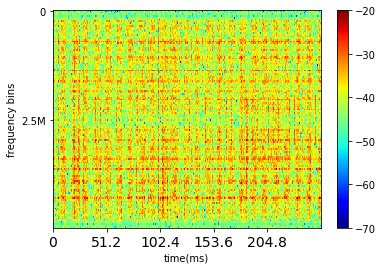

In [331]:
folder = '/net/adv_spectrum/data/downsample/downsample_10/abnormal/871_ab_psk/'
file = '1580854676_871M_5m_psk_ap'
M_spec = plot_single_spec(folder + file)

In [332]:
np.mean(M_spec - spec)

-3.4614185390624996

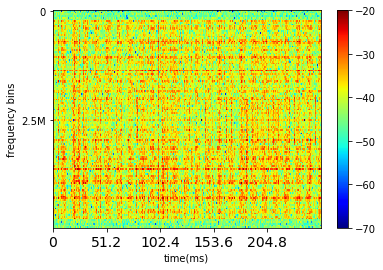

In [333]:
folder = '/net/adv_spectrum/data/downsample/downsample_10/abnormal/871_ab_ask/'
file = '1580854676_871M_5m_ask_ap'
spec = plot_single_spec(folder + file)

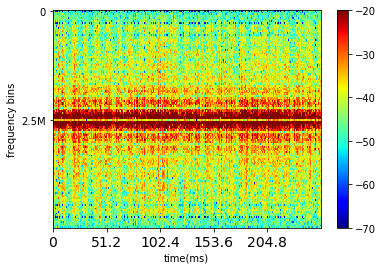

In [334]:
folder = '/net/adv_spectrum/data/downsample/downsample_10/abnormal/871_ab_fsk/'
file = '1580854676_871M_5m_fsk_ap'
spec = plot_single_spec(folder + file)

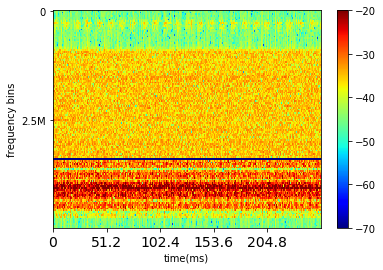

In [339]:
folder = '/net/adv_spectrum/data/downsample/downsample_10/abnormal/downtown_qam/'
file = '1519371960_880M_5m_qam_ap'
spec = plot_single_spec(folder + file)

In [309]:
spec

array([[-42.773, -43.225, -46.141, ..., -40.703, -43.054, -42.332],
       [-45.663, -44.673, -44.287, ..., -43.093, -48.876, -43.557],
       [-41.291, -41.02 , -41.475, ..., -41.63 , -41.465, -42.856],
       ...,
       [-55.42 , -45.403, -52.996, ..., -45.515, -46.89 , -49.509],
       [-41.404, -44.846, -39.827, ..., -40.301, -40.378, -40.27 ],
       [-44.601, -43.717, -42.721, ..., -42.576, -44.646, -46.476]])

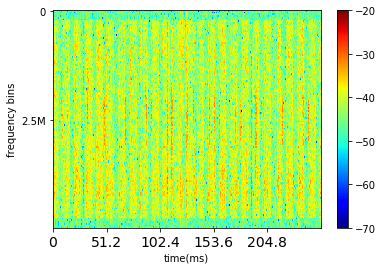

In [158]:
folder = '/net/adv_spectrum/data/downsample/downsample_10/normal/871_ab/'
spec = plot_single_spec(folder + '1580854898_871M_5m_ap')

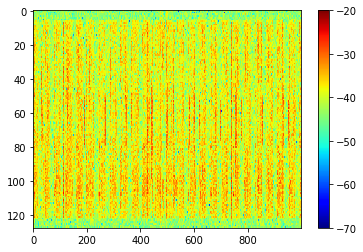

In [178]:
data_array = np.array(data).T
fig = plt.figure()
im = plt.imshow(data_array,cmap='jet',vmin=-70,vmax=-20,aspect='auto')
fig.colorbar(im)

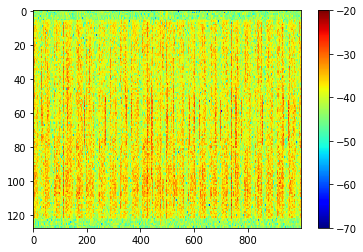

In [175]:
data_array = np.array(data).T
fig = plt.figure()
im = plt.imshow(data_array,cmap='jet',vmin=-70,vmax=-20,aspect='auto')
fig.colorbar(im)

## ASK generations

In [8]:
from matplotlib import *
import sys
fs = 44000  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = int(fs/baud)
N = Nbits * Ns
f0 = 880000000
bits = randn(Nbits,1) > 0

Text(0.5, 1.0, 'OOK signal of the sequence:[[1 0 0 1 1 1 1 1 0 0]]')

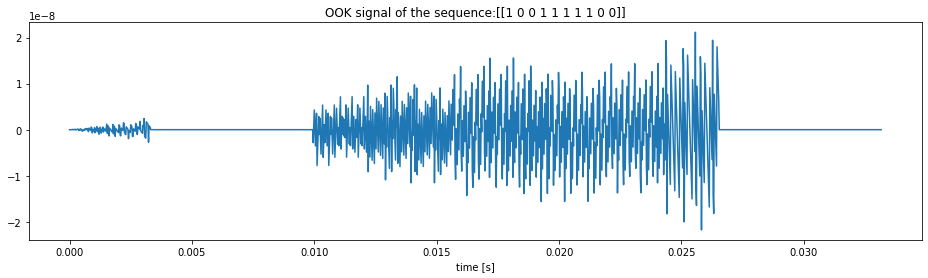

In [9]:
# np.random.seed(seed=1)
bits = np.random.randn(Nbits,1) > 0
M = np.tile(bits,(1,Ns))
t = r_[0.0:N]/fs
OOK = M.ravel()*sin(2*pi*f0*t)

fig = plt.figure(figsize = (16,4))
plt.plot(t,OOK)
plt.xlabel('time [s]')
plt.title('OOK signal of the sequence:'+ np.array2string(np.transpose(np.uint8(bits))))

In [10]:
f = r_[0:N/2.0]/N*fs

# OOK_f = (np.fft.fft(OOK, 128))
Y = np.fft.fft(OOK, 2560)
P1 = np.fft.fftshift(Y)
P2 = np.absolute(P1)
amp = 10*np.log10(P2/2560)

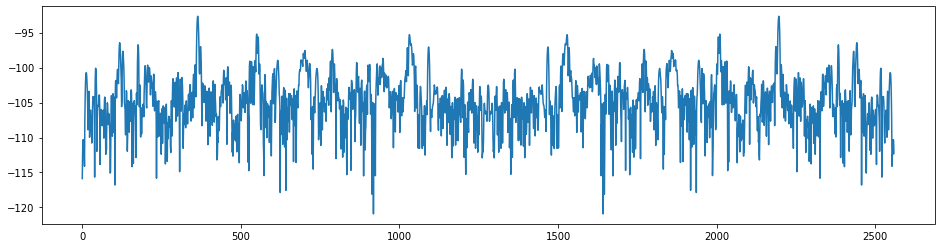

In [11]:
amp.shape
fig = plt.figure(figsize = (16,4))
plt.plot(range(2560), amp)

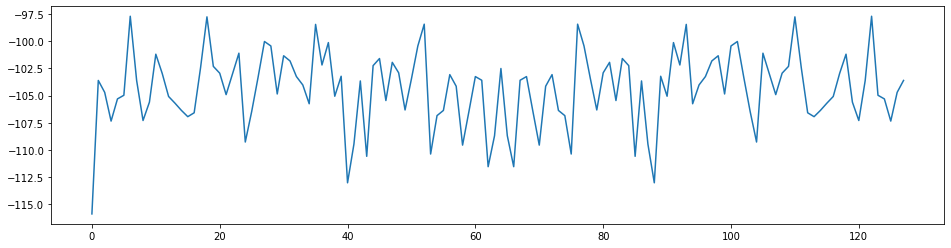

In [15]:
fig = plt.figure(figsize = (16,4))
plt.plot(range(128), amp[::20])

In [16]:
fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(OOK_f[:int(len(OOK_f)/2)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of an OOK signal ')
plt.axis((0,128,0,max(abs(OOK_f))))

NameError: name 'OOK_f' is not defined

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1, 'Spectrogram of ASK')

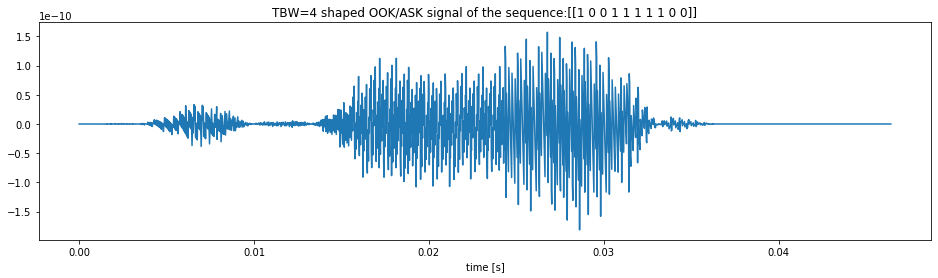

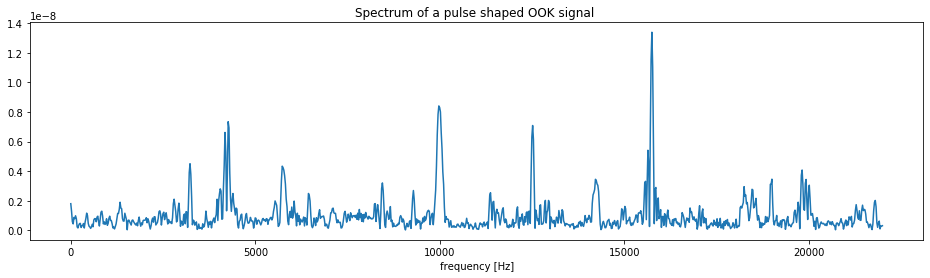

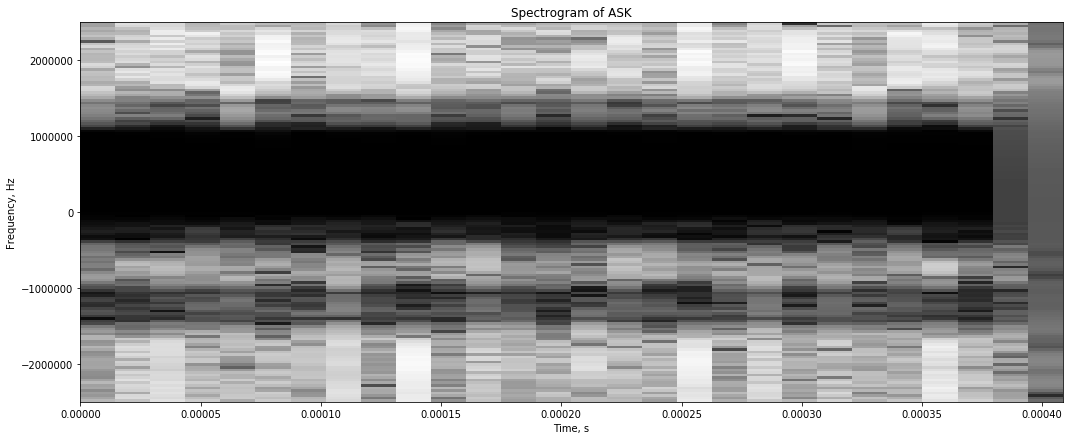

In [17]:
imp = zeros(N)
imp[::Ns] = bits.ravel()

h = signal.firwin(Ns*4,1.0/Ns)
imp_sinc = signal.fftconvolve(imp,h,mode='full')
t = r_[0.0:len(imp_sinc)]/fs
OOK_s = imp_sinc*sin(2*pi*f0*t)

fig = plt.figure(figsize = (16,4))
plt.plot(t,OOK_s)
plt.xlabel('time [s]')
plt.title('TBW=4 shaped OOK/ASK signal of the sequence:'+ np.array2string(np.transpose(np.uint8(bits))))

f = r_[0:len(imp_sinc)/2.0]/len(imp_sinc)*fs
OOK_sf = (np.fft.fft(OOK_s))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(OOK_sf[0:int(len(OOK_sf)/2+1)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a pulse shaped OOK signal ')
# plt.axis((0,4096,0,max(abs(OOK_sf))))

tt,ff,xmf = myspectrogram_hann_ovlp(OOK_sf, 148, 5000000, 0,dbf = 60)
plt.title('Spectrogram of ASK')

## BPSK generations

In [18]:
fs = 44100  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = int(fs/baud)
N = Nbits * Ns
f0 = 1800
bits = randn(Nbits,1) > 0

In [19]:
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'BPSK signal of the sequence:[[1 0 0 0 1 0 1 0 1 0]]')

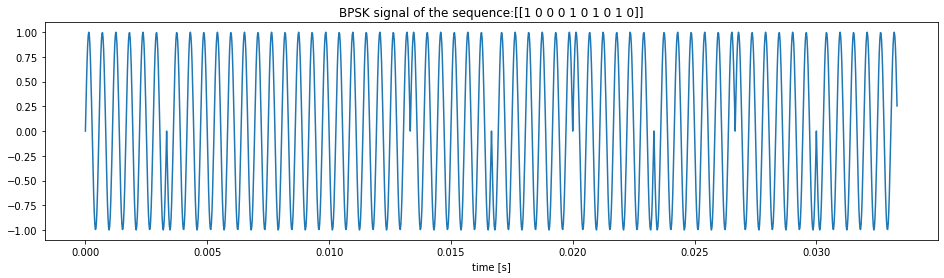

In [20]:
np.random.seed(seed=1)
bits = randn(Nbits,1) > 0 
# print(bits)
M = np.tile(bits*2-1,(1,Ns))
t = r_[0.0:N]/fs
BPSK = M.ravel()*sin(2*pi*f0*t)

fig = plt.figure(figsize = (16,4))
plt.plot(t,BPSK)
plt.xlabel('time [s]')
plt.title('BPSK signal of the sequence:'+ np.array2string(np.transpose(np.uint8(bits))))

ValueError: x and y must have same first dimension, but have shapes (735,) and (64,)

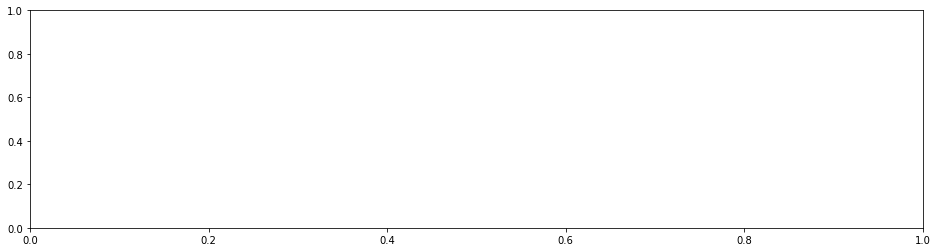

In [23]:
f = r_[0:N/2.0]/N*fs

BPSK_f = (np.fft.fft(BPSK, 128))
Y = np.fft.fft(BPSK, 2560)
P1 = np.fft.fftshift(Y)
P2 = np.absolute(P1)
amp = 10*np.log10(P2/128)
# plt.plot(range(128), amp[::20])
fig = plt.figure(figsize = (16,4))
plt.plot(f, abs(BPSK_f[0:int(len(BPSK_f)/2)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a BPSK signal ')
plt.axis((0,4096,0,max(abs(BPSK_f))))

## Add a filter to the generated signals

Text(0.5, 1, 'Spectrogram of MSK')

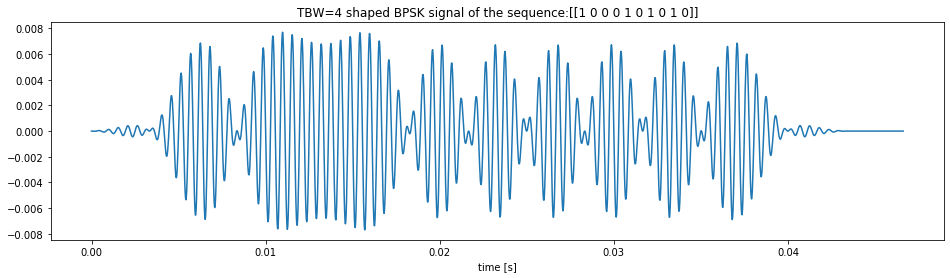

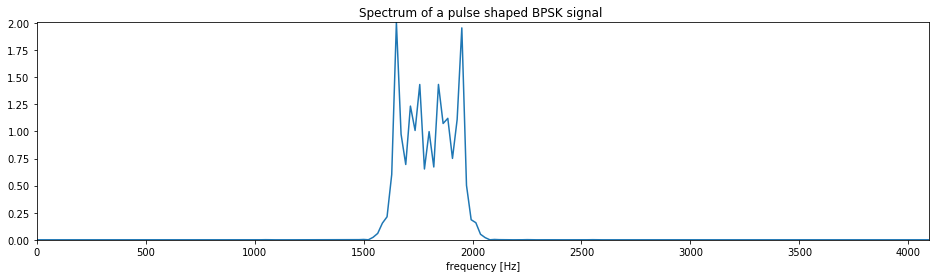

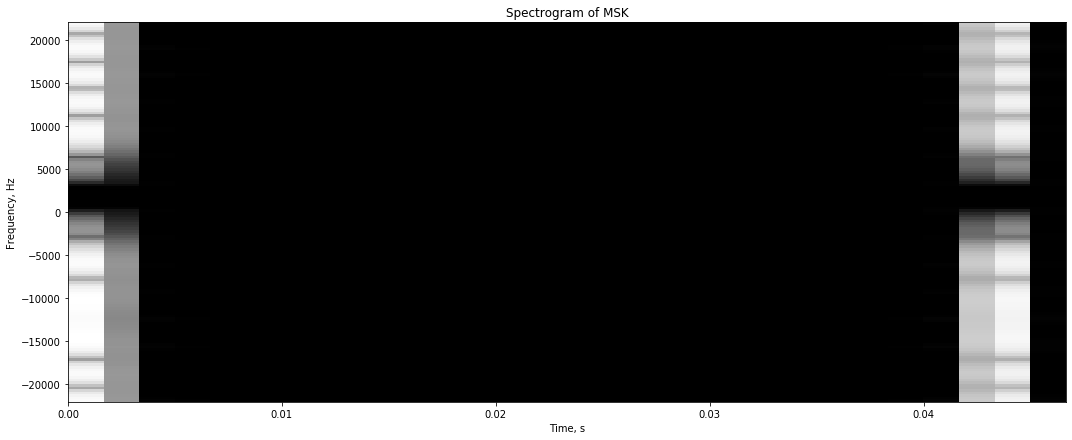

In [24]:
imp = zeros(N)
imp[::Ns] = bits.ravel()*2-1

h = signal.firwin(Ns*4,1.0/Ns)
imp_sinc = signal.fftconvolve(imp,h,mode='full')
t = r_[0.0:len(imp_sinc)]/fs
BPSK_s = imp_sinc*sin(2*pi*f0*t)

fig = plt.figure(figsize = (16,4))
plt.plot(t,BPSK_s)
plt.xlabel('time [s]')
plt.title('TBW=4 shaped BPSK signal of the sequence:'+ np.array2string(np.transpose(np.uint8(bits))))

f = r_[0:len(imp_sinc)/2.0]/len(imp_sinc)*fs
BPSK_sf = (np.fft.fft(BPSK_s))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(BPSK_sf[0:int(len(BPSK_sf)/2+1)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a pulse shaped BPSK signal ')
plt.axis((0,4096,0,max(abs(BPSK_sf))))

tt,ff,xmf = myspectrogram_hann_ovlp(BPSK_sf, 148, 44100.0, 0,dbf = 60)
plt.title('Spectrogram of MSK')

In [54]:
BPSK_sf.shape

(2057,)

## FSK generation

In [54]:
fs = 44100  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = int(fs/baud)
N = Nbits * Ns
f0 = 1800
bits = randn(Nbits,1) > 0

Text(0.5, 1.0, 'FSK signal of the sequence:[[1 0 0 0 1 0 1 0 1 0]]')

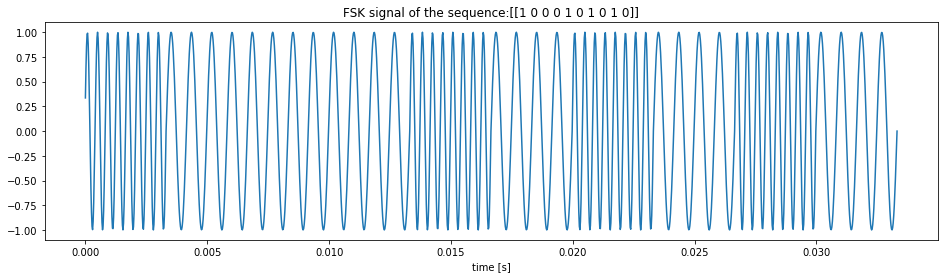

In [55]:
np.random.seed(seed=1)
Nbits = 10
N = Nbits * Ns
bits = randn(Nbits,1) > 0 
M = np.tile(bits*2-1,(1,Ns))
delta_f = 600


# compute phase by integrating frequency
ph = 2*pi*np.cumsum(f0 + M.ravel()*delta_f)/fs
t = r_[0.0:N]/fs
FSK = sin(ph)

fig = plt.figure(figsize = (16,4))
plt.plot(t,FSK)
plt.xlabel('time [s]')
plt.title('FSK signal of the sequence:'+ np.array2string(np.transpose(np.uint8(bits))))

(0, 4096, 0, 441.00000000000006)

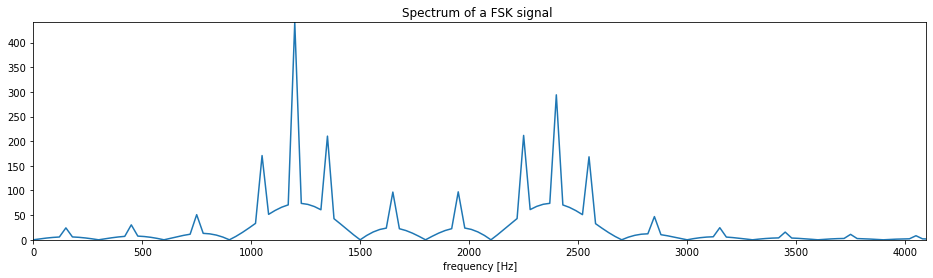

In [56]:
f = r_[0:N/2.0]/N*fs

FSK_f = (np.fft.fft(FSK))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(FSK_f[0:int(len(FSK_f)/2)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a FSK signal ')
plt.axis((0,4096,0,max(abs(FSK_f))))

1


Text(0.5, 1, 'Spectrogram of MSK')

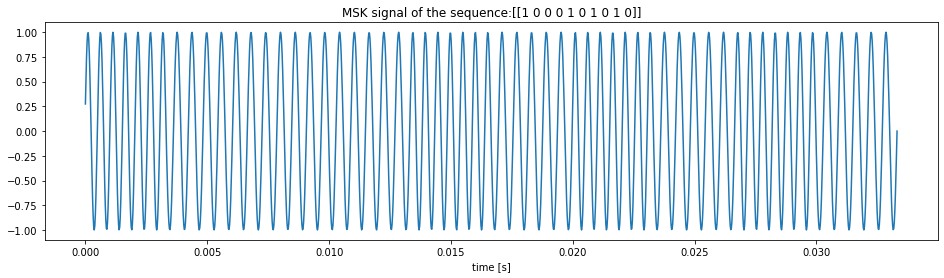

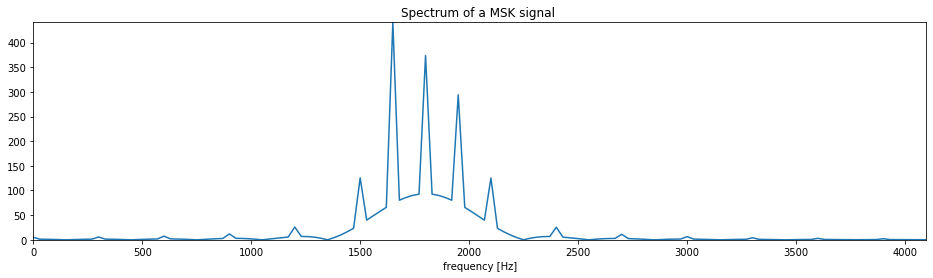

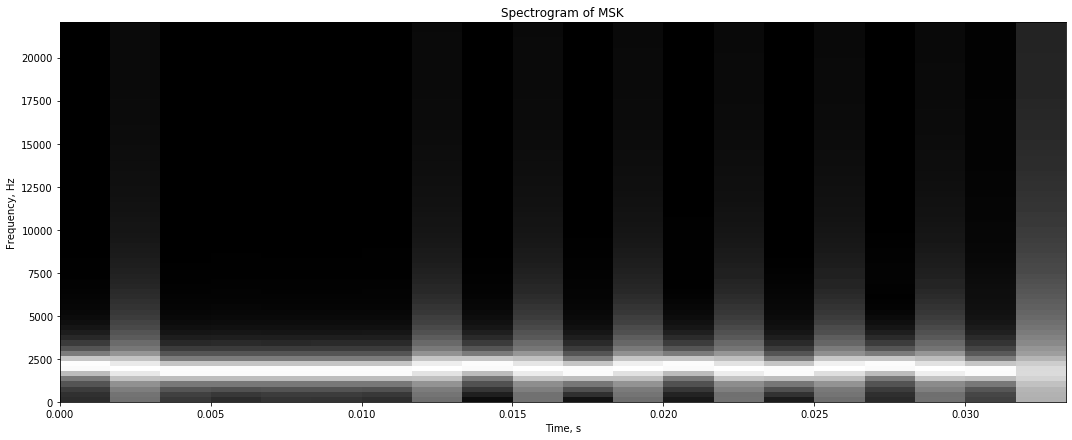

In [57]:
delta_f = 150
ph = 2*pi*np.cumsum(f0 + M.ravel()*delta_f)/fs
t = r_[0.0:N]/fs
MSK = sin(ph)

fig = plt.figure(figsize = (16,4))
plt.plot(t,MSK)
plt.xlabel('time [s]')
plt.title('MSK signal of the sequence:'+ np.array2string(np.transpose(np.uint8(bits))))

f = r_[0:N/2.0]/N*fs

MSK_f = (np.fft.fft(MSK))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(MSK_f[0:int(len(MSK_f)/2)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a MSK signal ')
plt.axis((0,4096,0,max(abs(MSK_f))))

tt,ff,xmf = myspectrogram_hann_ovlp(MSK, 148, 44100.0, 0,dbf = 60)
plt.title('Spectrogram of MSK')

In [58]:
M

array([[ 1,  1,  1, ...,  1,  1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [59]:
FSK

array([ 3.35317346e-01,  6.31808455e-01,  8.55142763e-01, ...,
       -3.35317346e-01, -1.70139300e-01, -1.37160442e-14])

## QAM generations

In [33]:
fs = 440000  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = int(fs/baud)
N = Nbits * Ns
f0 = 880000000
bits = randn(Nbits,1) > 0

In [49]:
fs = 44100  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = int(fs/baud)
N = Nbits * Ns
f0 = 880000000
bits = randn(Nbits,1) > 0

Text(0.5, 1.0, 'QAM=16 of the sequence:[[ 6 11  0  4  2  1  2  5  6  8  6 10  3 14  0 10]]')

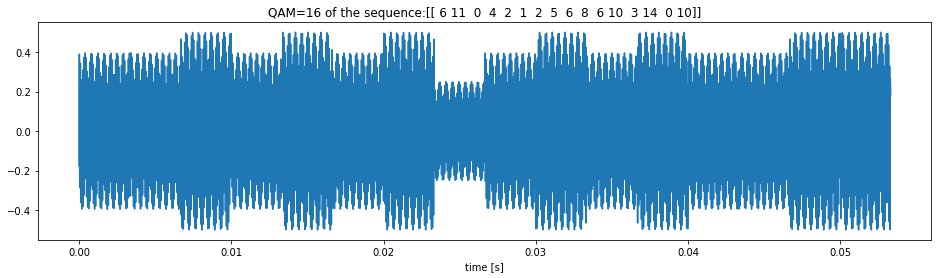

In [50]:
Nbits = 16  # number of bits
N = Nbits * Ns
code = np.array((-2-2j, -2-1j,-2+2j,-2+1j,-1-2j,-1-1j,-1+2j,-1+1j,+2-2j,+2-1j,+2+2j,+2+1j,1-2j,+1-1j,1+2j,1+1j))/2
np.random.seed(seed=1)
bits = np.int16(np.random.rand(Nbits,1)*16) 
M = np.tile(code[bits], (1,Ns))
t = r_[0.0:N]/fs

# these are two ways of producing the same result:
#QAM = (M.real.ravel()*cos(2*pi*f0*t) - M.imag.ravel()*sin(2*pi*f0*t))/2/sqrt(2)
QAM = np.real(M.ravel()*np.exp(1j*2*np.pi*f0*t))/np.sqrt(2)/2
fig = plt.figure(figsize = (16,4))
plt.plot(t,QAM.real)
plt.xlabel('time [s]')
plt.title("QAM=16 of the sequence:"+ np.array2string(np.transpose(bits)))

Text(0.5, 1, 'Spectrogram of QAM16')

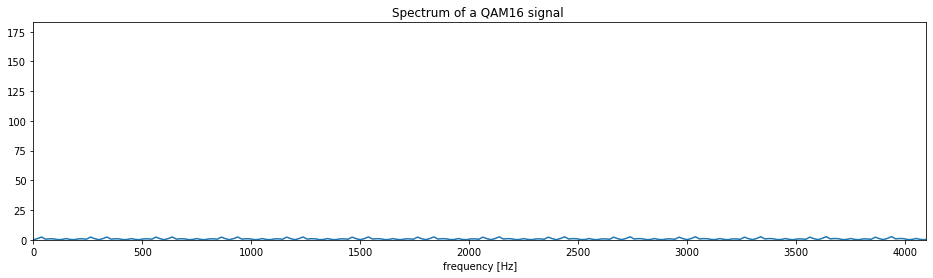

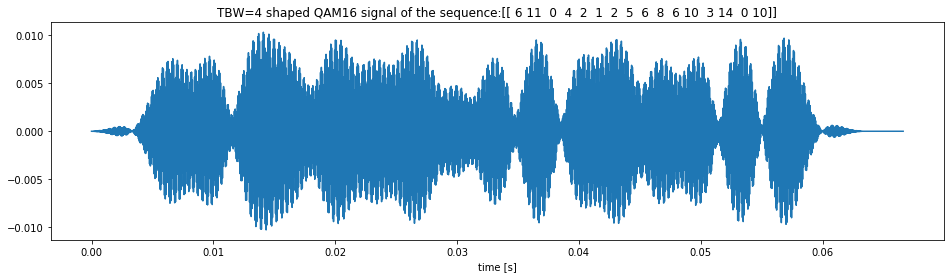

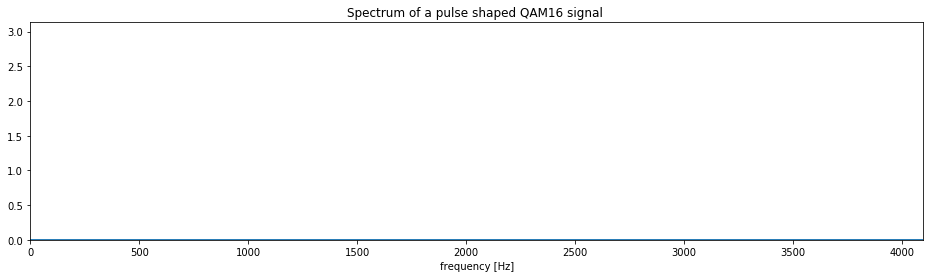

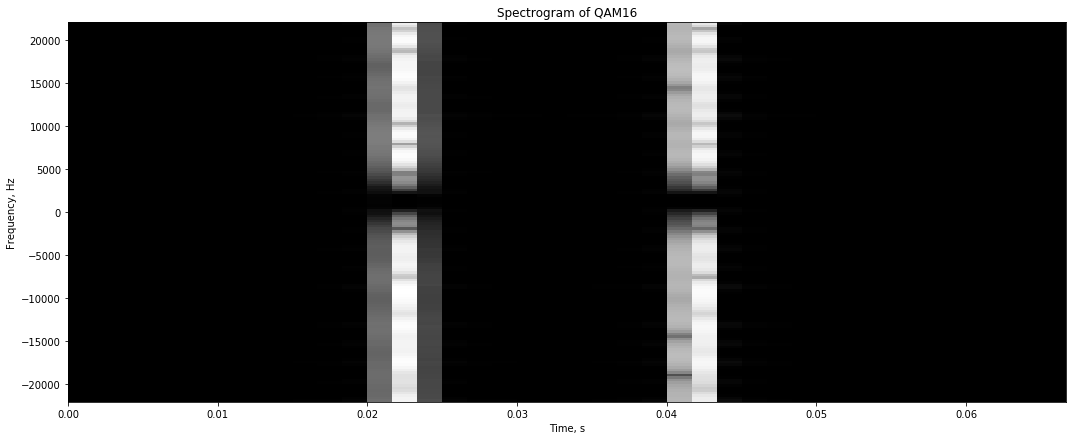

In [51]:
f = r_[0:N/2.0]/N*fs

QAM_f = (np.fft.fft(QAM))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(QAM_f[0:int(len(QAM_f)/2)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a QAM16 signal ')
plt.axis((0,4096,0,max(abs(QAM_f))))


imp = zeros(N,dtype='complex')
imp[::Ns] = code[bits].ravel()

h = signal.firwin(Ns*4,1.0/Ns)
imp_sinc = signal.fftconvolve(imp,h,mode='full')
t = r_[0.0:len(imp_sinc)]/fs
QAM_s = np.real(imp_sinc*np.exp(1j*2*pi*f0*t))


fig = plt.figure(figsize = (16,4))
plt.plot(t,QAM_s)
plt.xlabel('time [s]')
plt.title('TBW=4 shaped QAM16 signal of the sequence:'+ np.array2string(np.transpose(bits)))
f = r_[0:len(imp_sinc)/2.0]/len(imp_sinc)*fs
QAM_sf = (np.fft.fft(QAM_s))

fig = plt.figure(figsize = (16,4))
plt.plot(f,abs(QAM_sf[0:int(len(QAM_sf)/2+1)]))
plt.xlabel('frequency [Hz]')
plt.title('Spectrum of a pulse shaped QAM16 signal ')
plt.axis((0,4096,0,max(abs(QAM_sf))))

tt,ff,xmf = myspectrogram_hann_ovlp(QAM_sf, 148, 44100.0, 0,dbf = 60)
plt.title('Spectrogram of QAM16')

# Try adding the signals from raw level

In [7]:
import numpy as np
folder_path = '/net/adv_spectrum/data/downsample/downsample_10/normal/871_ab/'
file_name = '1580854676_871M_5m_ap.txt'

fid = open(folder_path + file_name, 'rb')
fft = fid.readline()

In [20]:
fft= np.array([float(j) for j in fft.split()])

In [23]:
ifftshift = np.fft.ifftshift(fft)
ifft = np.fft.ifft(ifftshift)

In [24]:
ifft

array([-3.68982812e+01+0.j        ,  6.40000989e-01-0.00195196j,
       -8.89043284e-02-0.14548405j,  1.29088601e+00-0.12252384j,
        3.91828808e-02-0.07266186j,  9.38548884e-01+0.0318278j ,
        9.25161926e-02-0.19064918j,  5.02506181e-01+0.02051894j,
        5.68021530e-02+0.0900587j ,  3.00808224e-01-0.10020159j,
        1.64937762e-01-0.22944757j,  2.38757325e-01+0.22782354j,
        3.22051154e-01+0.27464949j,  1.44692228e-01-0.02308087j,
       -2.93013499e-02-0.07469865j, -1.60431750e-01+0.15546399j,
        5.09315314e-01-0.15866027j,  2.28560027e-01-0.16961348j,
        4.37839597e-02+0.11904469j, -1.08571501e-01+0.16849732j,
        1.44420278e-01-0.15390218j,  1.71122723e-01+0.16388226j,
       -3.13534692e-02-0.05460722j,  2.84855753e-01-0.23311891j,
        7.85479264e-02+0.10455411j,  1.53635277e-01+0.02354857j,
        2.36429730e-01-0.20453203j,  2.15967221e-01+0.34393675j,
       -1.08187052e-01-0.0732082j ,  1.74178598e-01-0.45924103j,
        1.83809668e-01-0.

In [52]:
QAM[::20].shape

(118,)

In [53]:
M

array([[-0.5+1.j , -0.5+1.j , -0.5+1.j , ..., -0.5+1.j , -0.5+1.j ,
        -0.5+1.j ],
       [ 1. +0.5j,  1. +0.5j,  1. +0.5j, ...,  1. +0.5j,  1. +0.5j,
         1. +0.5j],
       [-1. -1.j , -1. -1.j , -1. -1.j , ..., -1. -1.j , -1. -1.j ,
        -1. -1.j ],
       ...,
       [ 0.5+1.j ,  0.5+1.j ,  0.5+1.j , ...,  0.5+1.j ,  0.5+1.j ,
         0.5+1.j ],
       [-1. -1.j , -1. -1.j , -1. -1.j , ..., -1. -1.j , -1. -1.j ,
        -1. -1.j ],
       [ 1. +1.j ,  1. +1.j ,  1. +1.j , ...,  1. +1.j ,  1. +1.j ,
         1. +1.j ]])